In [258]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load DATA SET

In [259]:
DATA_IN_PATH = './data_set/'

In [260]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')

In [261]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# TRAIN DATA EDA

In [262]:
print('파일 크기 : ')
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
sample_submission.csv         24.69MB
test.csv                      481.16MB
train.csv                     63.4MB


### train data set size < test data set size

In [263]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 404290


In [264]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)

In [265]:
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [266]:
print('학습 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

학습 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


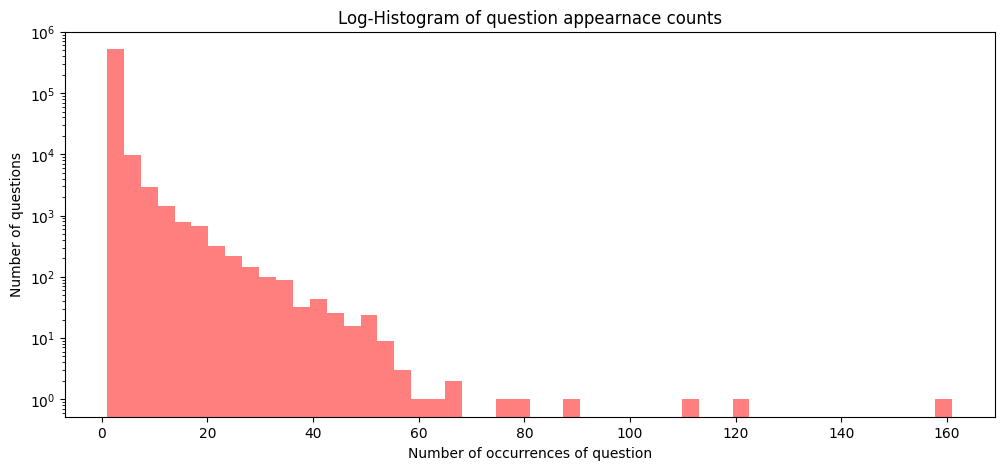

In [267]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of question appearnace counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.show()

In [268]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제1사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제3사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제1사분위 중복: 1.0
제3사분위 중복: 1.0


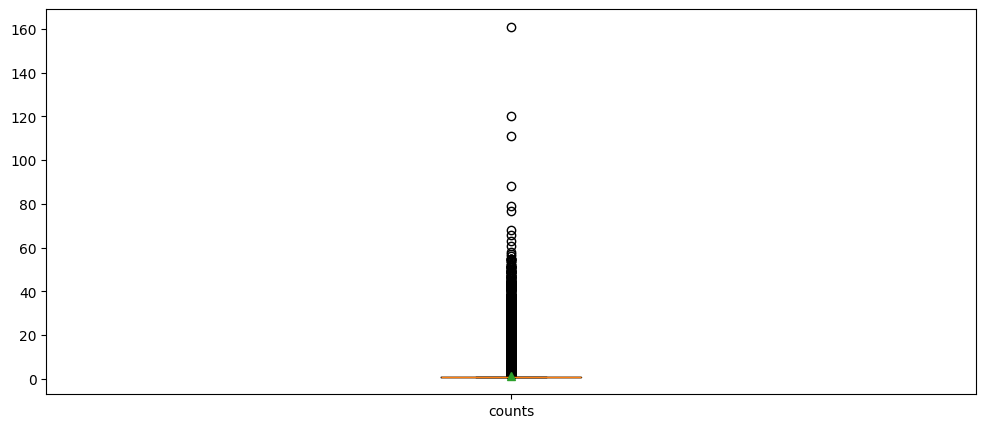

In [269]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()], tick_labels=['counts'], showmeans=True)
plt.show()

In [270]:
from wordcloud import WordCloud

In [271]:
cloud = WordCloud(width=300, height=150).generate(" ".join(train_set.astype(str)))

(-0.5, 299.5, 149.5, -0.5)

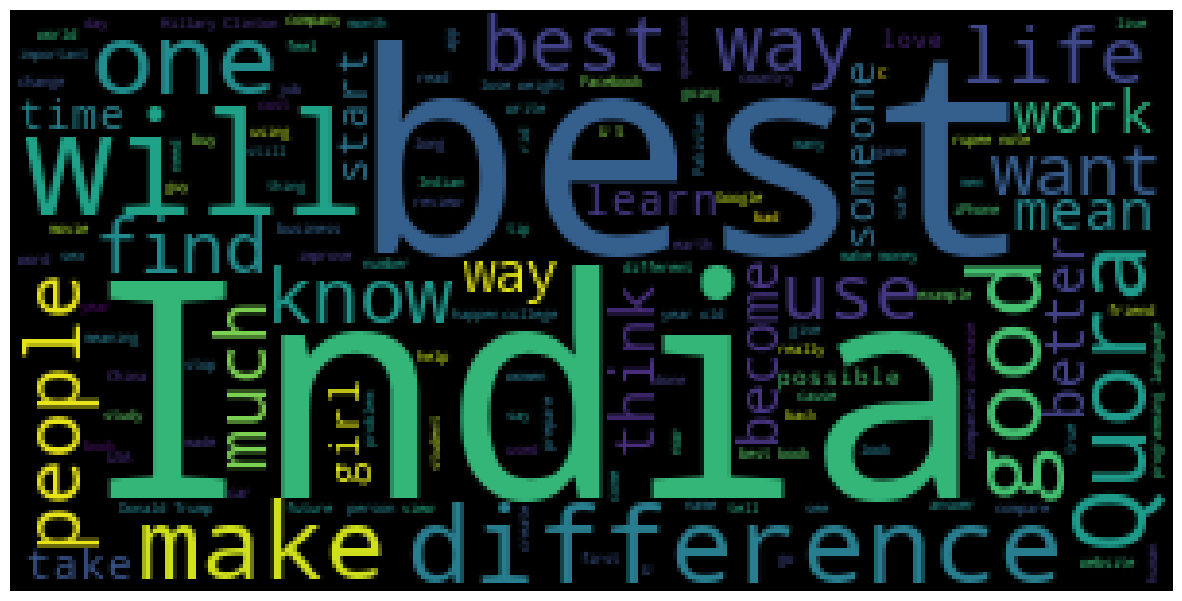

In [272]:
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

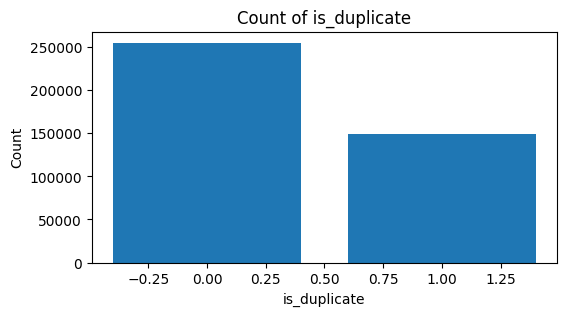

In [273]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(6,3)

duplicate_counts = train_data['is_duplicate'].value_counts()

ax.bar(duplicate_counts.index, duplicate_counts.values)

ax.set_xlabel('is_duplicate')
ax.set_ylabel('Count')
ax.set_title('Count of is_duplicate')
plt.show()

In [274]:
train_length = train_set.apply(len)

In [275]:
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

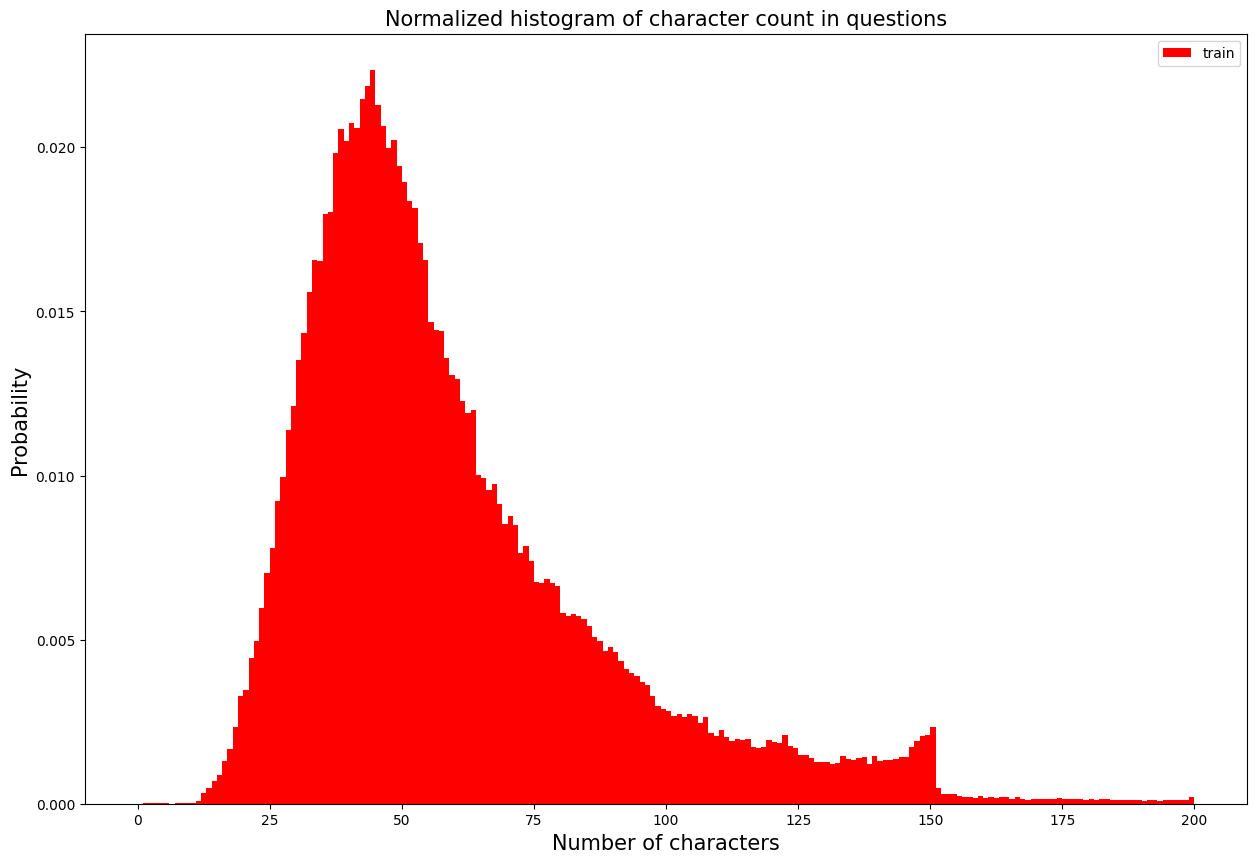

In [276]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalized histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [277]:
print('질문 길이 최댓값: {}'.format(np.max(train_length)))
print('질문 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값: {}'.format(np.median(train_length)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값: 1169
질문 길이 평균값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간값: 51.0
질문 길이 제3사분위: 39.0
질문 길이 제3사분위: 72.0


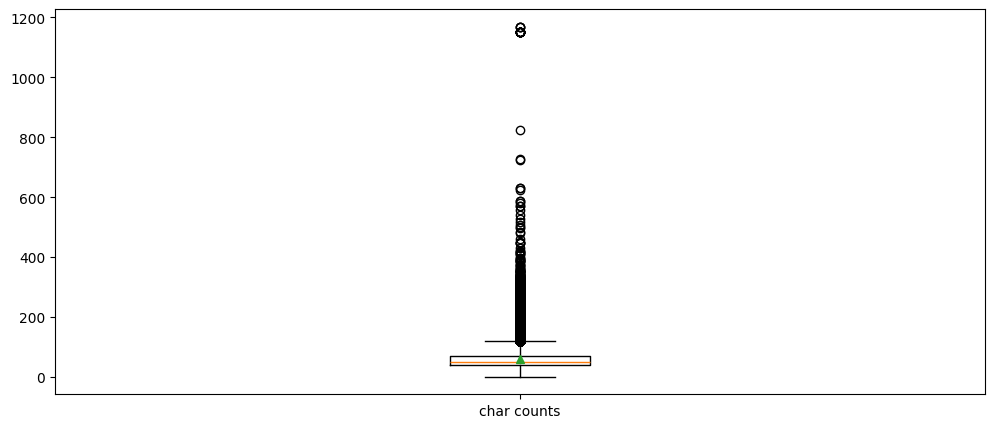

In [278]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, tick_labels=['char counts'], showmeans=True)
plt.show()

In [279]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

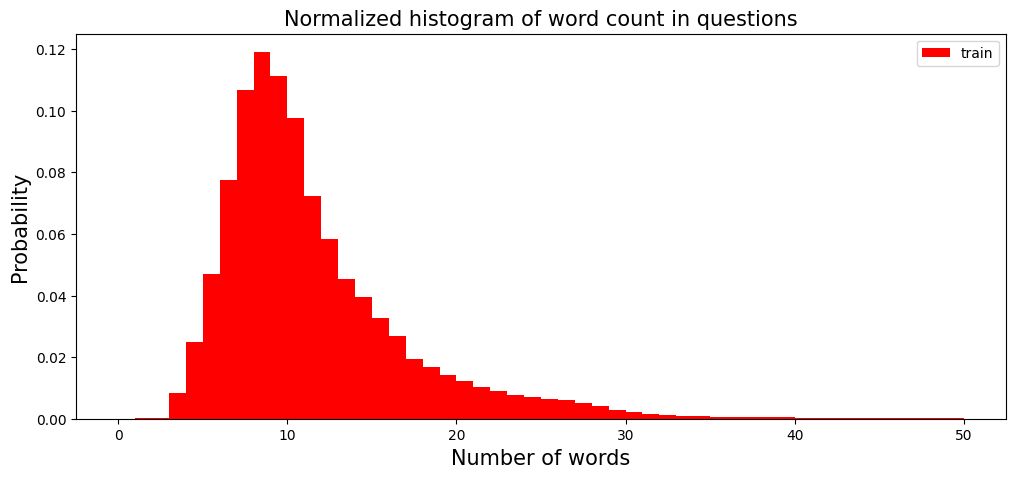

In [280]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalized histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [281]:
print('질문 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최댓값: 237
질문 단어 개수 평균값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간값: 10.0
질문 단어 개수 제3사분위: 7.0
질문 단어 개수 제3사분위: 13.0
질문 단어 개수 99퍼센트: 31.0


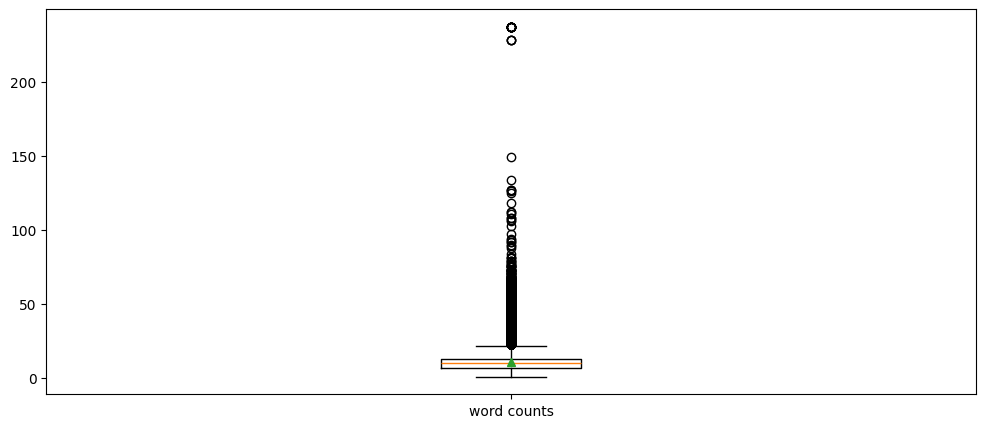

In [282]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts, tick_labels=['word counts'], showmeans=True)
plt.show()

In [283]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda  x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first =np.mean(train_set.apply(lambda x:x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

In [284]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가 있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자인 질문: 99.81%
대문자가 있는 질문: 99.95%
숫자가 있는 질문: 11.83%


# Data Preprocessing

In [285]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [286]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [287]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

In [288]:
len(train_pos_data)

149263

In [289]:
len(train_neg_data)

255027

In [290]:
class_difference = len(train_neg_data) - len(train_pos_data)

In [291]:
sample_frac = 1 - (class_difference / len(train_neg_data))

In [292]:
sample_frac

0.5852831268846044

In [293]:
train_neg_data = train_neg_data.sample(frac = sample_frac)

In [294]:
len(train_neg_data)

149263

In [295]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [296]:
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

In [297]:
change_filter = re.compile(FILTERS)

In [298]:
question1 = [str(s) for s in train_data['question1']]
question2 = [str(s) for s in train_data['question2']]

In [299]:
filtered_question1 = list()
filtered_question2 = list()

for q in question1:
    filtered_question1.append(re.sub(change_filter, "", q).lower())

for q in question2:
    filtered_question2.append(re.sub(change_filter, "", q).lower())

In [300]:
filtered_question1

['when watching a movie on a smartphone should the battery be plugged in',
 'what is your experience with the starbucks app new order ahead feature',
 'how can i get a job in the companies like apple google microsoft as a computer engineer',
 'what is the best way to introduce a kitten 1 month male to a 11 yr old male cat and a large 10 year old female dog',
 'what are the best examples of branded utility beyond nike+ and fiat ecodrive',
 'cr is written on the credit side but why is it dr for debit',
 'why should i attend the grace hopper celebration of women in computing',
 'how do actress handle themselves during sex/intimate scenes',
 'are there any jobs in net technologies in arab countries',
 'what is the probability of an exact tie in a race',
 'what are hypnotic effects of repetitive rhythmical music',
 'how much money does president obama make each year',
 'how can i unite and become the emperor of africa',
 'which is the most trustable ufo picture ever taken',
 'im a 14 years 

In [301]:
filtered_question2

['what were the best movies of 2016 why',
 'if you had to create a new slogan for starbucks what would it be',
 'what is the scope for an electrical engineer to get a job in a software giant company like google microsoft ibm infosys etc',
 'is cat a male or female whats a male cat called',
 'what are the best typography video ads examples',
 'what does mean that an account has normal debit / credit value',
 'who is attending the 2014 grace hopper celebration of women in computing',
 'what is it like to earn rs 200 crores per year in india',
 'what should i do to change jobs after 8 yrs of exp working in not-so-good technology like ldap and unix compared to javanet',
 'can someone with a bachelor degree in mathematics be a physicist later',
 'can a snake be hypnotized and de-hypnotized',
 'is president obama a muslim',
 'how can i be the emperor of southern africa',
 'whats the best picture taken of you and why do you think its the best',
 'im 14 years old and my penis is only 4 inches 

In [302]:
tokenizer = Tokenizer()

In [303]:
tokenizer.fit_on_texts(filtered_question1 + filtered_question2)

In [304]:
question1_sequence = tokenizer.texts_to_sequences(filtered_question1)
question2_sequence = tokenizer.texts_to_sequences(filtered_question2)

In [305]:
question1_sequence

[[39, 969, 7, 158, 20, 7, 903, 30, 1, 1100, 23, 6330, 8],
 [2, 3, 32, 307, 31, 1, 4666, 203, 73, 530, 4707, 2109],
 [4, 13, 5, 27, 7, 111, 8, 1, 266, 40, 510, 136, 983, 45, 7, 202, 361],
 [2,
  3,
  1,
  17,
  52,
  6,
  2467,
  7,
  8566,
  165,
  364,
  787,
  6,
  7,
  1106,
  5643,
  144,
  787,
  451,
  12,
  7,
  1272,
  226,
  105,
  144,
  806,
  556],
 [2, 11, 1, 17, 192, 10, 6127, 9231, 3379, 6778, 12, 18368, 45092],
 [14562, 3, 993, 20, 1, 686, 610, 103, 16, 3, 19, 3016, 14, 1774],
 [16, 30, 5, 2259, 1, 8567, 16551, 9427, 10, 201, 8, 2536],
 [4, 9, 2004, 1802, 1352, 233, 147, 8018, 2611],
 [11, 44, 61, 431, 8, 835, 1775, 8, 4248, 313],
 [2, 3, 1, 1770, 10, 33, 2307, 3874, 8, 7, 1522],
 [2, 11, 28871, 285, 10, 9604, 45093, 377],
 [4, 77, 59, 21, 163, 872, 54, 411, 105],
 [4, 13, 5, 6855, 12, 89, 1, 5589, 10, 1698],
 [22, 3, 1, 50, 12638, 4460, 729, 79, 836],
 [153, 7, 1312, 172, 144, 832, 12, 18, 772, 3, 196, 33, 3739],
 [2, 291, 39, 15, 11, 4285],
 [4, 9, 6943, 74],
 [22,
  

In [306]:
q1_data = pad_sequences(question1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(question2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [307]:
q1_data

array([[  39,  969,    7, ...,    0,    0,    0],
       [   2,    3,   32, ...,    0,    0,    0],
       [   4,   13,    5, ...,    0,    0,    0],
       ...,
       [   4,   21,    7, ...,    0,    0,    0],
       [   2,   21, 8660, ...,    0,    0,    0],
       [   9,   15,  306, ...,    0,    0,    0]])

In [308]:
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0

In [309]:
word_vocab

{'the': 1,
 'what': 2,
 'is': 3,
 'how': 4,
 'i': 5,
 'to': 6,
 'a': 7,
 'in': 8,
 'do': 9,
 'of': 10,
 'are': 11,
 'and': 12,
 'can': 13,
 'for': 14,
 'you': 15,
 'why': 16,
 'best': 17,
 'my': 18,
 'it': 19,
 'on': 20,
 'does': 21,
 'which': 22,
 'be': 23,
 'if': 24,
 'some': 25,
 'or': 26,
 'get': 27,
 'that': 28,
 'have': 29,
 'should': 30,
 'with': 31,
 'your': 32,
 'an': 33,
 'from': 34,
 'india': 35,
 'will': 36,
 'people': 37,
 'who': 38,
 'when': 39,
 'like': 40,
 'good': 41,
 'would': 42,
 'at': 43,
 'there': 44,
 'as': 45,
 'quora': 46,
 'about': 47,
 'between': 48,
 'not': 49,
 'most': 50,
 'one': 51,
 'way': 52,
 'we': 53,
 'make': 54,
 'did': 55,
 'life': 56,
 'by': 57,
 'where': 58,
 'money': 59,
 'was': 60,
 'any': 61,
 'so': 62,
 'time': 63,
 'me': 64,
 'after': 65,
 'learn': 66,
 'they': 67,
 'know': 68,
 'this': 69,
 'whats': 70,
 'has': 71,
 'difference': 72,
 'new': 73,
 'think': 74,
 'trump': 75,
 'use': 76,
 'much': 77,
 'am': 78,
 'ever': 79,
 'indian': 80,
 'al

In [310]:
labels = np.array(train_data['is_duplicate'], dtype=int)

In [311]:
print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data: {}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print('Words in index: {}'.format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 76469


In [312]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [313]:
data_configs

{'vocab': {'the': 1,
  'what': 2,
  'is': 3,
  'how': 4,
  'i': 5,
  'to': 6,
  'a': 7,
  'in': 8,
  'do': 9,
  'of': 10,
  'are': 11,
  'and': 12,
  'can': 13,
  'for': 14,
  'you': 15,
  'why': 16,
  'best': 17,
  'my': 18,
  'it': 19,
  'on': 20,
  'does': 21,
  'which': 22,
  'be': 23,
  'if': 24,
  'some': 25,
  'or': 26,
  'get': 27,
  'that': 28,
  'have': 29,
  'should': 30,
  'with': 31,
  'your': 32,
  'an': 33,
  'from': 34,
  'india': 35,
  'will': 36,
  'people': 37,
  'who': 38,
  'when': 39,
  'like': 40,
  'good': 41,
  'would': 42,
  'at': 43,
  'there': 44,
  'as': 45,
  'quora': 46,
  'about': 47,
  'between': 48,
  'not': 49,
  'most': 50,
  'one': 51,
  'way': 52,
  'we': 53,
  'make': 54,
  'did': 55,
  'life': 56,
  'by': 57,
  'where': 58,
  'money': 59,
  'was': 60,
  'any': 61,
  'so': 62,
  'time': 63,
  'me': 64,
  'after': 65,
  'learn': 66,
  'they': 67,
  'know': 68,
  'this': 69,
  'whats': 70,
  'has': 71,
  'difference': 72,
  'new': 73,
  'think': 74,

# Save Train data set

In [314]:
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA = 'label_train.npy'
DATA_CONFIGS = 'data_configs.json'

In [315]:
PREPRO_DATA_PATH = './preprocessed_data/'

In [316]:
np.save(open(PREPRO_DATA_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(PREPRO_DATA_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(PREPRO_DATA_PATH + TRAIN_LABEL_DATA, 'wb'), labels)

In [317]:
json.dump(data_configs, open(PREPRO_DATA_PATH + DATA_CONFIGS, 'w'))

# Load Test data set

In [318]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')

C:\Users\User\AppData\Local\Temp\ipykernel_39752\862812218.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')


In [319]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [320]:
len(test_data)

3563475

In [321]:
valid_ids = [type(x) == int for x in test_data.test_id]

In [322]:
test_data = test_data[valid_ids].drop_duplicates()

In [323]:
len(test_data)

2345796

In [324]:
test_question1 = [str(s) for s in test_data['question1']]
test_question2 = [str(s) for s in test_data['question2']]

In [325]:
filtered_test_question1 = list()
filtered_test_question2 = list()

In [326]:
for q in test_question1:
    filtered_test_question1.append(re.sub(change_filter, "", q).lower())

for q in test_question2:
    filtered_test_question2.append(re.sub(change_filter, "", q).lower())

In [327]:
test_question1_sequence = tokenizer.texts_to_sequences(filtered_test_question1)
test_question2_sequence = tokenizer.texts_to_sequences(filtered_test_question2)

In [328]:
test_q1_data = pad_sequences(test_question1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_question2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [329]:
test_id = np.array(test_data['test_id'])

In [330]:
print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data: {}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data: (2345796, 31)
Shape of ids: (2345796,)


# Save Test data set

In [331]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

In [332]:
np.save(open(PREPRO_DATA_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(PREPRO_DATA_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(PREPRO_DATA_PATH + TEST_ID_DATA, 'wb'), test_id)